In [1]:
from pathlib import Path

In [1]:
import numpy as np

In [3]:
i=Path('./data/archive/chest_xray/train')

In [2]:
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import array_to_img, img_to_array, load_img


In [3]:
import tensorflow as tf

In [73]:
train_data_dir = i
#np=i +''
#pp=i +''
#f=[x for x in i.iterdir()]
#batch_size =len(f)
# Get all the data in the directory data/train, and reshape them
train_generator = ImageDataGenerator().flow_from_directory(
        train_data_dir, 
        target_size=(64, 64), batch_size=5216, color_mode = "grayscale")

# Create the datasets
train_images, train_labels = next(train_generator)

Found 5216 images belonging to 2 classes.


In [55]:
np.shape(train_images)

(5216, 64, 64, 1)

In [78]:
# Directory path
val_data_dir = './data/archive/chest_xray/val'
test_data_dir = './data/archive/chest_xray/test'

# Get all the data in the directory data/train (790 images), and reshape them
val_generator = ImageDataGenerator().flow_from_directory(
        val_data_dir, 
        target_size=(64, 64), batch_size= 16, color_mode = "grayscale")

# Get all the data in the directory data/validation (132 images), and reshape them
test_generator = ImageDataGenerator().flow_from_directory(
        test_data_dir, 
        target_size=(64, 64), batch_size=234+390, color_mode = "grayscale")


# Create the datasets
val_images, val_labels = next(val_generator)
test_images, test_labels = next(test_generator)

Found 16 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


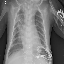

In [56]:
array_to_img(train_images[6])

In [64]:
sum(train_labels[:,1])

IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed

Training class distribution is 1341 to 3875, about 1:3, normal to pneumonia.  

In [4]:
import pickle

In [74]:
with open('train_images.pickle', 'wb') as f:
    pickle.dump(train_images, f)

In [75]:
with open('train_labels.pickle', 'wb') as f:
    pickle.dump(train_labels, f)

In [79]:
with open('test_images.pickle', 'wb') as f:
    pickle.dump(test_images, f)

In [69]:
with open('test_labels.pickle', 'wb') as f:
    pickle.dump(test_labels, f)

In [80]:
with open('val_images.pickle', 'wb') as f:
    pickle.dump(val_images, f)

    
with open('val_labels.pickle', 'wb') as f:
    pickle.dump(val_labels, f)
    


In [5]:
with open('train_images.pickle', 'rb') as g:
    train_images2= pickle.load(g)
with open('test_images.pickle', 'rb') as f:
    test_images1= pickle.load(f)
with open('val_images.pickle', 'rb') as f:
    val_images1= pickle.load(f)
    
with open('train_labels.pickle', 'rb') as f:
    train_labels1= pickle.load(f)
with open('test_labels.pickle', 'rb') as f:
    test_labels1= pickle.load(f)
with open('val_labels.pickle', 'rb') as f:
    val_labels1= pickle.load(f)
    
    

In [6]:
t = np.append(train_images2, val_images1, axis=0)
t1 = np.append(train_labels1, val_labels1, axis=0)


In [7]:
t = np.append(t, test_images1, axis=0)
t1 = np.append(t1, test_labels1, axis=0)
np.shape(t)

(5856, 64, 64, 1)

In [8]:
from sklearn.model_selection import train_test_split

In [10]:

np.shape(t1) 

(5856, 2)

In [9]:
train_images, test_images, train_labels, test_labels = train_test_split(t, t1) 
train_images, val_images, train_labels, val_labels = train_test_split(train_images, train_labels) 

In [10]:
test_images = np.reshape(test_images, (1464,64*64))
np.shape(test_images)

(1464, 4096)

In [11]:
train_images = np.reshape(train_images, (np.shape(train_images)[0],64*64))
np.shape(train_images)

val_images = np.reshape(val_images, (np.shape(val_images)[0],64*64))
#np.shape(val_images)

In [12]:
import pandas as pd
#s = pd.Series(val)
#s.sort_values(desc=False)

In [13]:

import matplotlib.pyplot as plt
%matplotlib inline
from keras.models import Sequential
from keras.layers import Dense
#import os


In [20]:
np.shape(train_labels)

(3294,)

In [14]:
train_labels= train_labels[:,0]
val_labels= val_labels[:,0]
test_labels= test_labels[:,0]

In [15]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(64, input_shape = (4096,), activation = 'tanh'))
model.add(tf.keras.layers.Dense(1, activation = 'sigmoid'))
#model.add(tf.keras.layers.Activation('relu'))

In [16]:
model.compile(optimizer = 'sgd', loss =  'mse', metrics = ['acc'])


In [17]:
model.fit(train_images,train_labels, batch_size=64, epochs=4, validation_data =(val_images,val_labels))
#model.compile(optimizer = 'sgd', loss =  'mse', metrics = ['acc'])


Epoch 1/4
52/52 [==============================] - 1s 7ms/step - loss: 0.2030 - acc: 0.7237 - val_loss: 0.1974 - val_acc: 0.7341
Epoch 2/4
52/52 [==============================] - 0s 4ms/step - loss: 0.1997 - acc: 0.7268 - val_loss: 0.1953 - val_acc: 0.7341
Epoch 3/4
52/52 [==============================] - 0s 4ms/step - loss: 0.1987 - acc: 0.7268 - val_loss: 0.1948 - val_acc: 0.7341
Epoch 4/4
52/52 [==============================] - 0s 4ms/step - loss: 0.1985 - acc: 0.7268 - val_loss: 0.1953 - val_acc: 0.7341


In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                262208    
                                                                 
 dense_1 (Dense)             (None, 1)                 65        
                                                                 
Total params: 262273 (1.00 MB)
Trainable params: 262273 (1.00 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [19]:
with open('model.pickle', 'wb') as f:
    pickle.dump(model, f)

In [23]:
model2 = tf.keras.Sequential()
model2.add(tf.keras.layers.Dense(64, input_shape = (4096,), activation = 'tanh'))
model2.add(tf.keras.layers.Dense(32, activation = 'tanh'))
model2.add(tf.keras.layers.Dense(1, activation = 'sigmoid'))
#model.add(tf.keras.layers.Activation('relu'))

In [24]:
model2.compile(optimizer = 'sgd', loss =  'mse', metrics = ['acc'])


In [25]:
model2.fit(train_images,train_labels, batch_size=64, epochs=4, validation_data =(val_images,val_labels))
#

Epoch 1/4
52/52 [==============================] - 1s 6ms/step - loss: 0.2016 - acc: 0.7213 - val_loss: 0.1940 - val_acc: 0.7341
Epoch 2/4
52/52 [==============================] - 0s 4ms/step - loss: 0.1987 - acc: 0.7268 - val_loss: 0.1953 - val_acc: 0.7341
Epoch 3/4
52/52 [==============================] - 0s 4ms/step - loss: 0.1985 - acc: 0.7268 - val_loss: 0.1950 - val_acc: 0.7341
Epoch 4/4
52/52 [==============================] - 0s 4ms/step - loss: 0.1979 - acc: 0.7268 - val_loss: 0.1956 - val_acc: 0.7341


In [26]:
model2.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 64)                262208    
                                                                 
 dense_6 (Dense)             (None, 32)                2080      
                                                                 
 dense_7 (Dense)             (None, 1)                 33        
                                                                 
Total params: 264321 (1.01 MB)
Trainable params: 264321 (1.01 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [31]:
model2.get_weights()

[array([[-1.0728404e-03,  1.4095105e-02, -2.1492694e-02, ...,
         -2.8256787e-02,  2.8004274e-02,  3.1000011e-02],
        [-2.5070019e-02,  1.3704920e-02,  3.2803208e-02, ...,
         -4.7790250e-03,  2.8032262e-03,  2.7362950e-02],
        [ 3.0589547e-02,  6.6645285e-03,  8.7537095e-03, ...,
          3.7712954e-02, -1.3464628e-02,  1.8712878e-03],
        ...,
        [ 1.3985578e-02,  9.1286628e-03,  1.6147584e-02, ...,
         -2.5024969e-02,  1.8183509e-02,  5.2236021e-05],
        [-5.3115725e-04, -3.5559043e-02, -3.4170367e-02, ...,
         -3.2656953e-02,  2.5730340e-02, -2.4836130e-02],
        [-3.2884590e-02, -3.4457389e-02,  1.5547834e-02, ...,
         -1.1562874e-02,  8.0244187e-03, -1.2289748e-02]], dtype=float32),
 array([-2.9240821e-06, -2.7383935e-06,  0.0000000e+00, -4.5228194e-06,
        -8.7135759e-06, -3.3489414e-06,  6.1052770e-06,  0.0000000e+00,
         0.0000000e+00,  2.3563722e-07,  3.7414188e-06,  0.0000000e+00,
         0.0000000e+00,  2.6570581

In [32]:
train_images=train_images/255



In [33]:
val_images=val_images/255

(3294, 4096)

In [34]:
model.fit(train_images,train_labels, batch_size=64, epochs=4, validation_data =(val_images,val_labels))


Epoch 1/4
52/52 [==============================] - 0s 5ms/step - loss: 0.1912 - acc: 0.7268 - val_loss: 0.1791 - val_acc: 0.7350
Epoch 2/4
52/52 [==============================] - 0s 4ms/step - loss: 0.1671 - acc: 0.7456 - val_loss: 0.1435 - val_acc: 0.7842
Epoch 3/4
52/52 [==============================] - 0s 4ms/step - loss: 0.1464 - acc: 0.7911 - val_loss: 0.1017 - val_acc: 0.8634
Epoch 4/4
52/52 [==============================] - 0s 4ms/step - loss: 0.1311 - acc: 0.8367 - val_loss: 0.1077 - val_acc: 0.8534


In [36]:
with open('model.pickle', 'wb') as f:
    pickle.dump(model, f)

In [35]:
model2.fit(train_images,train_labels, batch_size=64, epochs=4, validation_data =(val_images,val_labels))


Epoch 1/4
52/52 [==============================] - 0s 5ms/step - loss: 0.1824 - acc: 0.7274 - val_loss: 0.2026 - val_acc: 0.6776
Epoch 2/4
52/52 [==============================] - 0s 5ms/step - loss: 0.1543 - acc: 0.7596 - val_loss: 0.1112 - val_acc: 0.8634
Epoch 3/4
52/52 [==============================] - 0s 4ms/step - loss: 0.1340 - acc: 0.8248 - val_loss: 0.1019 - val_acc: 0.8670
Epoch 4/4
52/52 [==============================] - 0s 4ms/step - loss: 0.1216 - acc: 0.8512 - val_loss: 0.0905 - val_acc: 0.8798


In [37]:
with open('model2.pickle', 'wb') as f:
    pickle.dump(model2, f)